Apartado A (Flourish)

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("examen.csv")

# Take only columns Country and Population
df_new = df[["Country", "Population"]]

# Create a new column named "StdDeviation" with the standard deviation of the population
df_new["StdDeviation"] = df_new["Population"].std()

# Export the dataset
df_new.to_csv("a.csv", index=False)


C:\Users\joszamama\AppData\Local\Temp\ipykernel_2268\810958669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["StdDeviation"] = df_new["Population"].std()


Apartado B (Flourish)

In [ ]:
# No he necesitado generar ningun dataset nuevo, he utilizado el que ya tenia

Apartado C (Flourish)

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv("examen.csv")

# Select the Country and Crops (%) columns and sort by Crops (%) in descending order
df_crops = df[["Country", "Crops (%)"]].sort_values(by="Crops (%)", ascending=False)

# Keep only the top 10 rows
df_crops = df_crops.iloc[:5]

# Add Spain as a reference country
df_spain = pd.DataFrame({"Country": ["Spain"], "Crops (%)": [df.loc[df["Country"]=="Spain", "Crops (%)"].values[0]]})
df_crops = pd.concat([df_spain, df_crops])

# Write the results to a new CSV file named c.csv
df_crops.to_csv("c.csv", index=False)

Apartado D (Flourish)

In [24]:
import pandas as pd

# COMPUTE THE MEAN OF COLUMN BIRTH RATE
df = pd.read_csv("examen.csv")
# PRINT
print(df["Birthrate"].mean())

22.114732142857147


Apartado E (Bokeh)

In [27]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
import pandas as pd

# Read in the original dataset
df = pd.read_csv('examen.csv')

# Select the columns we want
df = df[['Infant mortality (per 1000 births)', 'GDP ($ per capita)']]

# Create a ColumnDataSource from the dataframe
source = ColumnDataSource(df)

# Create the plot
p = figure(title='Infant Mortality vs GDP per Capita',
           x_axis_label='GDP ($ per capita)',
           y_axis_label='Infant Mortality (per 1000 births)')

# Add a scatter plot
p.scatter(x='GDP ($ per capita)',
          y='Infant mortality (per 1000 births)',
          source=source,
          size=10)

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

Apartado F (Bokeh)

In [26]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.io import output_notebook
import pandas as pd

# load data
df = pd.read_csv("examen.csv")

# create a column data source
source = ColumnDataSource(df)

# create the figure
p = figure(title="Distribution of Birth and Death Rates for the World Population",
           tools="hover",
           tooltips=[("Birthrate", "@Birthrate"), ("Deathrate", "@Deathrate")])

# add a scatter plot
p.scatter(x="Birthrate", y="Deathrate", size=10, alpha=0.5, source=source)

# format the x-axis tick labels
p.xaxis[0].formatter = NumeralTickFormatter(format="0.0")

# format the y-axis tick labels
p.yaxis[0].formatter = NumeralTickFormatter(format="0.0")

# set axis labels
p.xaxis.axis_label = "Birthrate"
p.yaxis.axis_label = "Deathrate"

# show the plot
output_notebook()
show(p)

Loading BokehJS ...

Apartado G (Flourish)

In [31]:
import pandas as pd

# Read the original csv file
df = pd.read_csv('examen.csv')

# Filter out the countries other than Morocco, Spain and France
df_h = df[df['Country'].isin(['Morocco', 'Spain', 'France'])]

# Keep only the desired columns
df_h = df_h[['Country', 'Agriculture', 'Industry', 'Service']]

# Save the resulting dataframe as h.csv
df_h.to_csv('g.csv', index=False)


Apartado H (Flourish)

In [34]:
import pandas as pd

# Read in the examen.csv and worldmap.csv files
examen_df = pd.read_csv('examen.csv')
worldmap_df = pd.read_csv('worldmap.csv')

# Merge the two dataframes based on the 'Country' column
merged_df = pd.merge(worldmap_df, examen_df, on='Country', how='left')

# Save the resulting dataframe as merged.csv
merged_df.to_csv('merged.csv', index=False)


Apartado I (Bokeh)

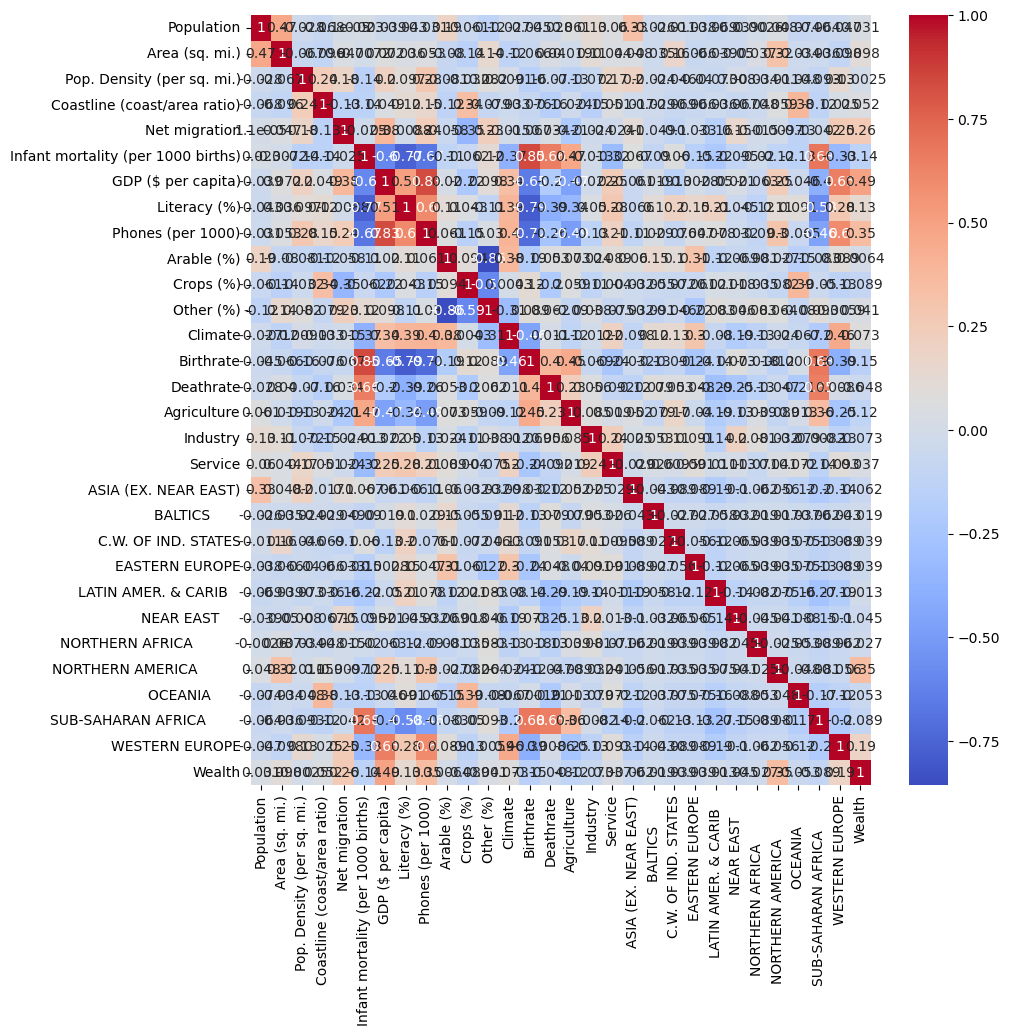

In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("examen.csv")

# One-hot encode the 'Region' column
df = pd.concat([df, pd.get_dummies(df['Region'])], axis=1)
df = df.drop(['Region', 'Country'], axis=1)

# Create a new column 'Wealth' based on the GDP values
df['Wealth'] = df['GDP ($ per capita)'].apply(lambda x: 1 if x > 33189 else 0)

# Normalize the columns using MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = df.columns.difference(['Wealth'])
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Calculate the correlation matrix between the columns
corr_matrix = df.corr()

# Extract the 'Wealth' column from the correlation matrix and sort the values in descending order
wealth_corr = corr_matrix['Wealth'].sort_values(ascending=False)

# plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Apartado J (Flourish)

In [59]:
# obtain the top 10 most correlated columns
top_10 = wealth_corr[1:11]

print(top_10)

GDP ($ per capita)              0.489058
NORTHERN AMERICA                0.349488
Phones (per 1000)               0.347302
Net migration                   0.261355
WESTERN EUROPE                  0.188730
Literacy (%)                    0.133940
Area (sq. mi.)                  0.097909
Climate                         0.072987
Coastline (coast/area ratio)    0.051932
Other (%)                       0.040683
Name: Wealth, dtype: float64
